Занятие 7. Деревья решений.
===============

Полезные ссылки.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

http://scikit-learn.org/stable/modules/cross_validation.html<br>
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics<br>


## Деревья решений для задач классификации

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os
os.chdir("C:/Users/USER/Documents/Python/_Python_part_1_Lectures/Shad_Python_10_2/")


In [2]:
#  df = pd.read_csv('Wine.txt', sep=';', encoding='cp1251')

df = pd.read_csv('Wine.txt', sep='\t')


In [3]:
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [4]:
df['Desired1(3)'].value_counts()

2    71
0    59
1    48
Name: Desired1(3), dtype: int64

In [5]:
df.shape

(178, 14)

In [6]:
#  разделяю предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 13].values  

In [7]:
#  разделяю на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  


In [ ]:
#  Стандартизация предикторов нужна?

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=10,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False
                              )

# Обучаем модель
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [9]:
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)


,feature,importance
9,Input10,0.405302
6,Input7,0.402757
12,Input13,0.191941
0,Input1,0.000000
1,Input2,0.000000
2,Input3,0.000000
3,Input4,0.000000
4,Input5,0.000000
5,Input6,0.000000
7,Input8,0.000000


In [10]:
# Строим предсказание модели
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [11]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2
0,19,0,4
1,0,15,2
2,0,0,19


In [12]:
conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2
0,34,0,2
1,0,31,0
2,0,0,52


In [13]:
#  conda install graphviz
#  conda install python-graphviz
#  https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn

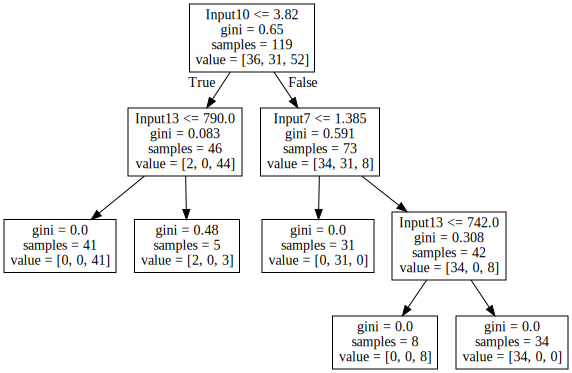

In [14]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(model, out_file=None, feature_names=df.iloc[:, :-1].columns))

Как и ранее, у данной модели реализован метод ```predict```, который позволяет получить предсказания классов для входного списка элементов, представленных в пространстве тех же самых признаков (то есть подаём на вход матрицу).

In [9]:
# Предсказание класса для новых элементов
new_item = [1, 1, 1, 1]
model.predict([new_item])

array([0])

## Оценка качества классификатора

Теперь нужно измерить качество предсказания. Зачастую для этого достаточно просто посчитать долю совпавших ответов в ```y_pred``` и ```y_test```. Но обычная точность даёт искажённые результаты в случае, когда в распределении классов имеется смещение. Например, если в бинарной классификации отношение классов 0/1 равно 90/10 и если у нас есть классификатор, который всегда отвечает 0, то тогда точность такой модели будет равна 0.9, что неоправданно высоко.

Чтобы избежать эти проблемы, надёжнее считать такие показатели как точность и полноту. Сначала построим матрицу ошибок $C = (c_{i,j})$, где $c_{i, j}$ -- количество элементов класса $i$, которым классификатор присвоил класс $j$. Для этого есть функция ```confusion_matrix``` в библиотеке ```sklearn.metrics```.

In [12]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,27,3
1,10,25


Тогда по определению
<center>
```
TP (True Positive) = 25
TN (True Negative) = 27
FP (False Positive) = 3
FN (False Negative) = 10
```
</center>

$$
\begin{array}{сс}
Precision = \frac{TP}{TP + FP} &
Recall = \frac{TP}{TP + FN}\\
\end{array}
$$

Физический смысл точности -- доля правильно классифицированных положительных объектов среди всех положительных объектов, _определённых классификатором_. Физический смысл полноты -- доля правильно классифицированных положительных объектов среди всех _истинных положительных объектов_.

Но для полного счастья хочется иметь не два, а одно число, описывающее качество классификатора. Для этого используют функции семейства F-мер. Например, гармоническое среднее:

$$F1 = \frac{2\cdot Precision \cdot Recall}{Precision + Recall}.$$

Но бывает, что точность и полнота важны для качества классификации не в равных степенях. Например, если мы определяем рак по фотоснимкам тканей, то нам гораздо важнее полнота: если классификатор сработает ложно, то в таком случае мы назначим лечение здоровому человеку. А вот если классификатор пропустит у пациента заболевание, то лечение мы не назначим, и это скорее всего приведёт к гораздо более тяжёлым последствиям. Наоборот, если мы классифицируем спам, то нам, вероятно, точность более важна, чем полнота. Если мы пропустим спамное сообщение и пользователь его прочитает, то это всего лишь мелкое недоразумение. А если мы ошибочно посчитаем важное сообщение спамом и удалим его, это уже криминал.

Так вот, для балансировки между точностью и полнотой используется параметр $\beta$:
$$F = (\beta^2 + 1)\frac{Precision \cdot Recall}{\beta^2Precision + Recall}.$$
Если мы отдаём приоритет точности, то нужно выбирать $\beta\in (0, 1)$, если полноте, то $\beta > 1$. При $\beta=1$ получаем определённую выше F1-меру.

Точность, полноту и F1-меру можно посчитать при помощи встроенной функции ```sklearn.metrics.classification_report```.

In [13]:
print metrics.classification_report(y_pred, y_test)

             precision    recall  f1-score   support

          0       0.90      0.73      0.81        37
          1       0.71      0.89      0.79        28

avg / total       0.82      0.80      0.80        65



## Деревья решений для задач регрессии

С помощью деревьев можно решать не только задачу классификации, но и задачу регрессии. То есть когда отклик не дискретный, а непрерывный. Для таких задач реализован класс ```sklearn.tree.DecisionTreeRegressor```, и все шаги по созданию модели точно так же переносятся и на этот класс (даже названия методов одни и те же).

## Случайные леса

Настроим модель случайных лесов для наших данных.

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=30,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=5,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None
                               
                              )

In [9]:
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [16]:
y_pred = model.predict(X_test)
print metrics.classification_report(y_pred, y_test)

             precision    recall  f1-score   support

          0       1.00      0.77      0.87        39
          1       0.74      1.00      0.85        26

avg / total       0.90      0.86      0.86        65



Видим, что по f1-скору случаный лес дал прирост в качестве с 0.80 до 0.86 по сравнению с одним решающим деревом.

In [21]:
print 'Out-of-bag score: {0}'.format(model.oob_score_) 

Out-of-bag score: 0.875968992248


In [17]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,з_плата,0.451255
2,возраст,0.421994
0,клаcс,0.109135
3,кр_карта,0.017616
